# Contents

### Import Librabries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar as cl

In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Energy Consumption EDA

#### Brief info on dataset
   * This company produces several types of coils, steel plates, and iron plates. The information on electricity           consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.
        * From the data we can tell-
            * Which times of the year is the most energy consumed?
            * What patterns can we identify in energy usage?

### Load dataset into a dataframe and view first 5 rows

In [3]:
# read dataset into df variable

df = pd.read_csv('Steel_industry_data.csv')

In [4]:
# view first 5 rows

df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Look at dataset info, shape and summary of values described

In [5]:
# view number of rows, columns

df.shape

(35040, 11)

In [6]:
# Gives brief information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

### Convert date column to datetime format

In [7]:
# converts date column to datetime

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

In [8]:
# view data
df.head(1)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load


### Check for null values

In [9]:
# checks row and columns for null values and sums if any
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

### Extract Year, Month, Day and Hour from Date Column

In [10]:
# Extract the year, month and hour from date column
df['Year'] = df['date'].dt.year # extracts year
df['Month'] = df['date'].dt.month.apply(lambda x: cl.month_abbr[x]) # extracts month
df['Hour'] = df['date'].dt.hour  # extracts hour

In [11]:
# view random rows from dataset
df.sample(n=5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month,Hour
21166,2018-08-09 11:45:00,103.72,61.78,0.0,0.05,85.91,100.0,42300,Weekday,Thursday,Maximum_Load,2018,Aug,11
8972,2018-04-04 11:15:00,46.84,31.36,0.0,0.02,83.10,100.0,40500,Weekday,Wednesday,Maximum_Load,2018,Apr,11
10556,2018-04-20 23:15:00,3.46,3.49,0.0,0.00,70.40,100.0,83700,Weekday,Friday,Light_Load,2018,Apr,23
9809,2018-04-13 04:30:00,4.25,6.62,0.0,0.00,54.02,100.0,16200,Weekday,Friday,Light_Load,2018,Apr,4
14334,2018-05-30 07:45:00,3.82,4.97,0.0,0.00,60.94,100.0,27900,Weekday,Wednesday,Light_Load,2018,May,7


### Check for dupliacted rows

In [12]:
# checks if any row is duplicated

df.duplicated().sum()

0

### Creating a sort order for Day of week , Month and Week

In [13]:
# define custom order for days of the week and month

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

month_order =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define custom order for week status
week_status_order = ['Weekday', 'Weekend']

In [14]:
# sort 'Day_of_week' column based on custom order

df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=day_order, ordered=True)

# sort 'Month' column based on custom order

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# sort 'WeekStatus' column based on custom order
df['WeekStatus'] = pd.Categorical(df['WeekStatus'], categories=week_status_order, ordered=True)

### Check for inconsistencies in text columns

In [15]:
consistency_check = df.groupby(['WeekStatus','Day_of_week','Load_Type'],observed=True,sort=True)[['date']].count()
consistency_check 

date
WeekStatus Day_of_week Load_Type         
Weekday    Monday      Light_Load    2288
                       Maximum_Load  1200
                       Medium_Load   1600
           Tuesday     Light_Load    2248
                       Maximum_Load  1176
                       Medium_Load   1568
           Wednesday   Light_Load    2248
                       Maximum_Load  1176
                       Medium_Load   1568
           Thursday    Light_Load    2192
                       Maximum_Load  1200
                       Medium_Load   1600
           Friday      Light_Load    2192
                       Maximum_Load  1200
                       Medium_Load   1600
Weekend    Saturday    Light_Load    2864
                       Maximum_Load   912
                       Medium_Load   1216
           Sunday      Light_Load    4040
                       Maximum_Load   408
                       Medium_Load    544

# Exploratory Analysis Visualization

### 1 . Group Hour and Day of Week columns BY Usage_kWh
* To find number of hours where energy is consumed.
* To find hours in days of week where energy is consumed.

In [16]:
# for getting the sum of usage_kwh per hour
Agg_values = df.groupby(['Hour'])[['Usage_kWh']].sum().reset_index()

# for getting the max usage_kwh per hour
Agg_values2 = df.groupby(['Hour'])[['Usage_kWh']].max().reset_index()

# for getting the average usage_kwh per hour
Agg_values3 = df.groupby(['Hour'])[['Usage_kWh']].mean().reset_index()


### What are the Total, Max and Average Energy Consumption per Hour for the Year.

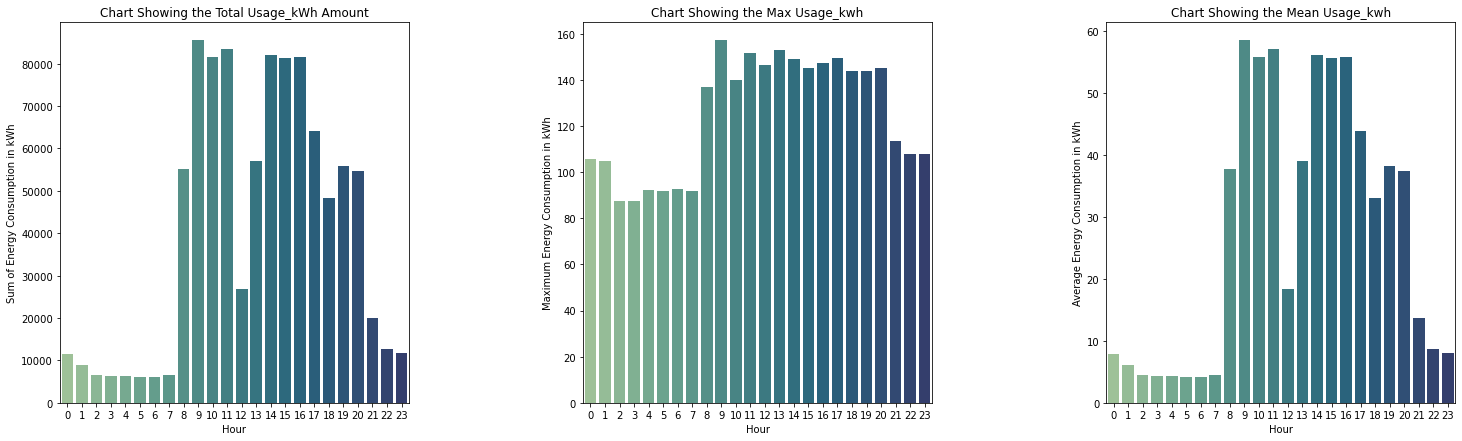

In [17]:
# create a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# plot the first graph in the first subplot
sns.barplot(x='Hour', y='Usage_kWh', data=Agg_values, ax=axes[0], palette='crest')
axes[0].set_title("Chart Showing the Total Usage_kWh Amount")
axes[0].set_ylabel('Sum of Energy Consumption in kWh')

# plot the second graph in the second subplot
sns.barplot(x='Hour', y='Usage_kWh', data=Agg_values2, ax=axes[1], palette='crest')
axes[1].set_title("Chart Showing the Max Usage_kwh")
axes[1].set_ylabel('Maximum Energy Consumption in kWh')

# plot the third graph in the third subplot
sns.barplot(x='Hour', y='Usage_kWh', data=Agg_values3, ax=axes[2], palette='crest')
axes[2].set_title("Chart Showing the Mean Usage_kwh")
axes[2].set_ylabel('Average Energy Consumption in kWh')


# adjust the spacing between subplots and display the plot
plt.subplots_adjust(wspace=0.5)
plt.show()

* Observations -
    * Throughtout the year, energy is consumed reaches its peak around 9am.
    * Max energy consumed is also at its peak around 9am, and we see a slight drop in max energy after that. As the Energy usage still remains high.
    * The average energy consumed, also at its highest at 9am and we see some drops in energy usage as the hours goes by.
    

### Highlighthing the Maximum and Minimum Energy Consumption for each graph 

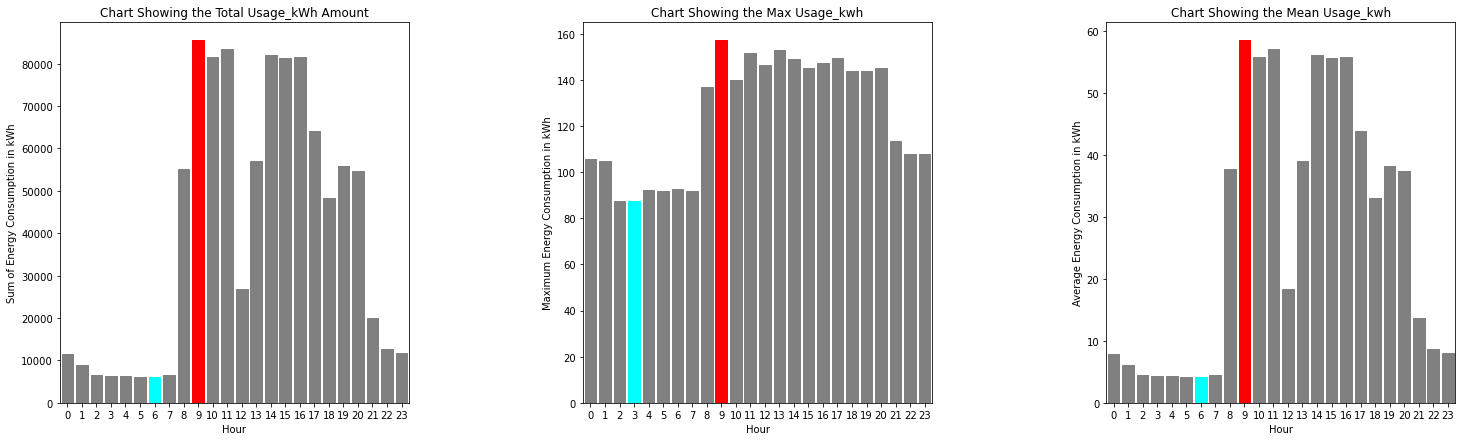

In [18]:
# create a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# plot the first graph in the first subplot
sns.barplot(x='Hour', y='Usage_kWh', data=Agg_values, ax=axes[0], palette='crest')

max_value = Agg_values['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Agg_values['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[0].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('red') # set the color of the patch to red
    else:
        p.set_color('grey') # set the color of the patch to grey
        
for p in axes[0].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('cyan') # set the color of the patch to green
        
axes[0].set_title("Chart Showing the Total Usage_kWh Amount")
axes[0].set_ylabel('Sum of Energy Consumption in kWh')


# plot the second graph in the second subplot
sns.barplot(x='Hour', y='Usage_kWh', data=Agg_values2, ax=axes[1], palette='crest')

max_value = Agg_values2['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Agg_values2['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[1].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('red') # set the color of the patch to red
    else:
        p.set_color('grey') # set the color of the patch to grey
        
for p in axes[1].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('cyan') # set the color of the patch to green
        
axes[1].set_title("Chart Showing the Max Usage_kwh")
axes[1].set_ylabel('Maximum Energy Consumption in kWh')


# plot the third graph in the third subplot
sns.barplot(x='Hour', y='Usage_kWh', data=Agg_values3, ax=axes[2], palette='crest')

max_value = Agg_values3['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Agg_values3['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[2].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the minimum value
        p.set_color('red') # set the color of the patch to red
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[2].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('cyan') # set the color of the patch to green
axes[2].set_title("Chart Showing the Mean Usage_kwh")
axes[2].set_ylabel('Average Energy Consumption in kWh')


# adjust the spacing between subplots and display the plot
plt.subplots_adjust(wspace=0.5)
plt.show()

* Observations -
    * Majorly At 9am we have the Highest Total Energy Consumption with kwh above 80,000 kwh, while the lowest consumption is at 6am with kwh below 10,000 kwh
    * Majorly At 9am we have the Highest Maximum Energy Consumption with Max kwh close to 160 kwh, while the lowest Maximum consumption is at 3am with kwh below 100 kwh
    * Majorly At 9am we have the Highest Average Energy Consumption with average kwh close to 60 kwh, while the lowest average consumption is at 6am kwh below 10 kwh

### On What days do we have higher level release of 'CO2(tCO2)' and which loads releases it more. 

In [19]:
# for getting the average CO2 release per day

Agg_DOW = df.groupby(['Day_of_week','Load_Type'],sort=False)[['CO2(tCO2)']].mean().reset_index()

Text(0, 0.5, 'Average CO2(tCO2)')

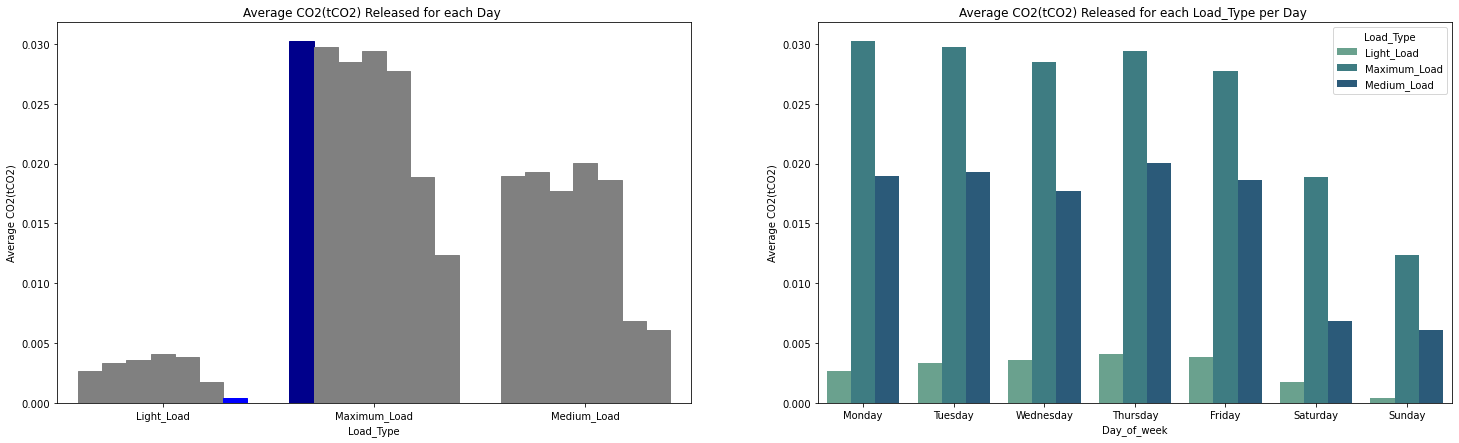

In [20]:
# create a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))

# plot the first graph in the first subplot
sns.barplot(x='Load_Type', y='CO2(tCO2)', hue='Day_of_week', data=Agg_DOW, ax=axes[0], color='grey',ci=0)
axes[0].legend().remove()

max_value = Agg_DOW['CO2(tCO2)'].max() # get the maximum value for CO2(tCO2)
min_value = Agg_DOW['CO2(tCO2)'].min() # get the minimum value for CO2(tCO2)

for p in axes[0].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the mimum value
        p.set_color('darkblue') # set the color of the patch to red
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[0].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('blue') # set the color of the patch to red
        
axes[0].set_title("Average CO2(tCO2) Released for each Day ") # Add title
axes[0].set_ylabel('Average CO2(tCO2)')

# plot the second graph in the second subplot
sns.barplot(x='Day_of_week', y='CO2(tCO2)',hue='Load_Type', data=Agg_DOW, ax=axes[1], palette='crest')
axes[1].set_title("Average CO2(tCO2) Released for each Load_Type per Day ") # Add title
axes[1].set_ylabel('Average CO2(tCO2)')



* Observations -
    * The Highest Average CO2 released of about 0.03(tCO2) is done by Maximum load and usually on Mondays
    * The lowest Average CO2 released below 0.005(tCO2) is done by Light Load and usually on Sundays

### 2 . How is the energy consumptions on different days of the week.

In [21]:
# for getting the max usage_kwh per day
WeekStatus = df.groupby(['WeekStatus','Day_of_week'],observed=True,sort=False)[['Usage_kWh']].max().reset_index()

# for getting the mean usage_kwh per day
WeekStatus2 = df.groupby(['WeekStatus','Day_of_week'],observed=True,sort=False)[['Usage_kWh']].mean().reset_index()

Text(0, 0.5, 'Average Consumption in kWh')

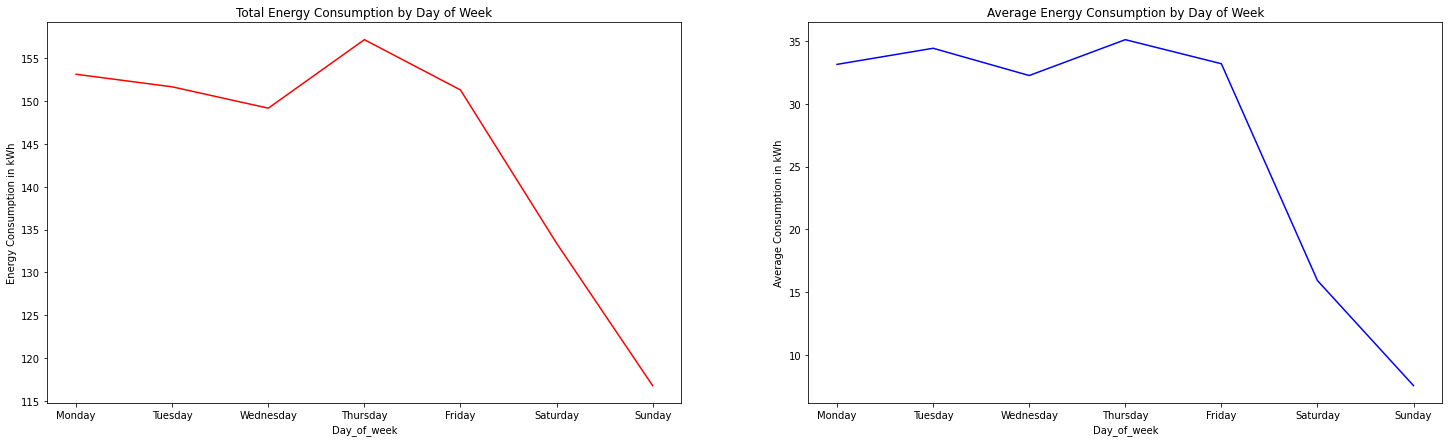

In [22]:
# create the grouped lineplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))

#plot first graph for first subplot
sns.lineplot(x='Day_of_week', y='Usage_kWh', data=WeekStatus, ax=axes[0], color='r')

# add title and axis labels
axes[0].set_title('Total Energy Consumption by Day of Week')
axes[0].set_ylabel('Energy Consumption in kWh')

#plot second graph for 2nd subplot
sns.lineplot(x='Day_of_week', y='Usage_kWh', data=WeekStatus2, ax=axes[1], color='b')

# add title and axis labels
axes[1].set_title('Average Energy Consumption by Day of Week')
axes[1].set_ylabel('Average Consumption in kWh')

* Observations -
    * Total Energy Consumption reaches its peak on Thursdays after a dip on Wednesdays, Followed by a sharp decline on Fridays and Weekends
    * We see a dip in Average Energy Consumption on Wednesdays Followed by a rise on Thursdays and then a fall again during weekends

In [23]:
# view dataset
df.head(2)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month,Hour
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,Jan,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,Jan,0


### 3. How do different Load types consume energy by week status

In [24]:
# for getting the sum of usage_kwh per weekstatus
weekS = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].sum().reset_index()

# for getting the max usage_kwh per weekstatus
weekS1 = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].max().reset_index()

# for getting the average usage_kwh per weekstatus
weekS2 = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().reset_index()


Text(0, 0.5, 'Average Consumption in kWh')

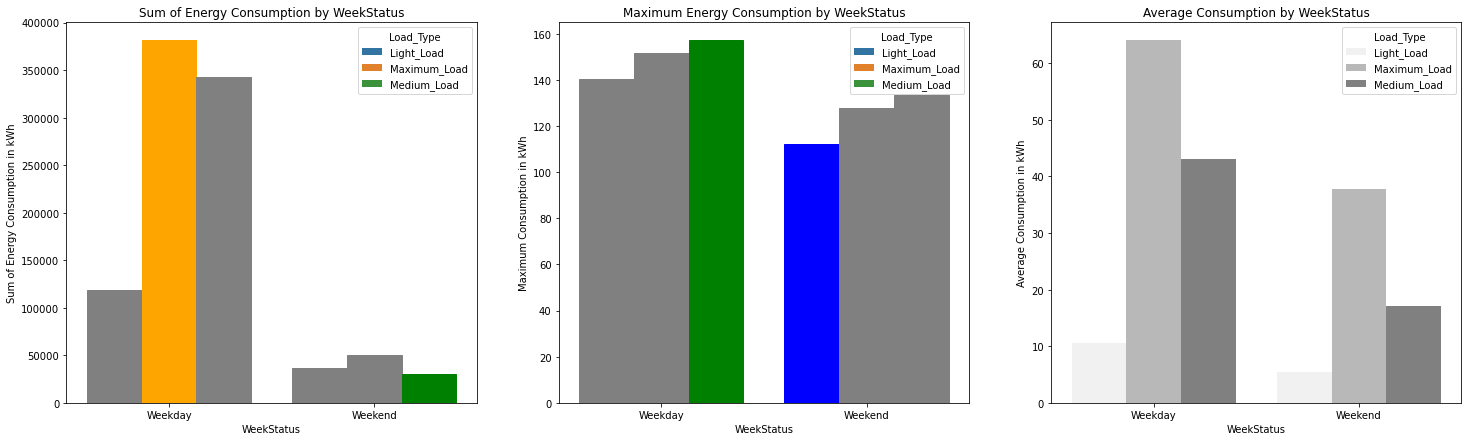

In [25]:
# create a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

#plot first graph for 1st subplot
sns.barplot(x = 'WeekStatus',y='Usage_kWh', data = weekS, hue='Load_Type', ax=axes[0] ,ci=0)

max_value = weekS['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = weekS['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[0].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('orange') # set the color of the patch to orange
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[0].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('green') # set the color of the patch to red
        
# add title and axis labels
axes[0].set_title('Sum of Energy Consumption by WeekStatus')
axes[0].set_ylabel('Sum of Energy Consumption in kWh')


#plot second graph for 2nd subplot
sns.barplot(x = 'WeekStatus',y='Usage_kWh', data = weekS1,hue='Load_Type', ax=axes[1], ci=0)

max_value = weekS1['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = weekS1['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[1].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('green') # set the color of the patch to green
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[1].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('blue') # set the color of the patch to blueb
        
# add title and axis labels
axes[1].set_title('Maximum Energy Consumption by WeekStatus')
axes[1].set_ylabel('Maximum Consumption in kWh')



#plot second graph for 3rd subplot
sns.barplot(x = 'WeekStatus',y='Usage_kWh', data = weekS2, hue='Load_Type',ax=axes[2], color='grey', ci=0)
# add title and axis labels
axes[2].set_title('Average Consumption by WeekStatus')
axes[2].set_ylabel('Average Consumption in kWh')

* Observations -
    * In total, maximum load consumes more energy on weekdays and medium load consumes the least but on weekends.
    * For Max consumption, medium load consumes more energy on weekdays and light load cosumes the least but on weekends.
    * On average, Maximum load takes most of our energy consumption for both weekdays and weekends.

### 4. What is the Average energy consumption on days of the week.

In [26]:
# to find the average usage_kwh per day
Load_DOW = df.groupby(['Day_of_week'],sort=False)['Usage_kWh'].mean().reset_index()

Text(0, 0.5, 'Average Daily Energy Consumption in kWh')

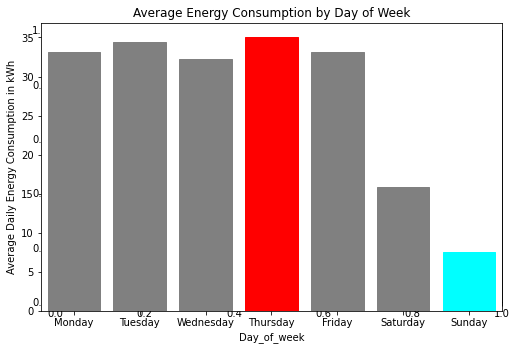

In [27]:
# create a grid of subplots with 1 row and 3 columns
fig, ax = plt.subplots(figsize=(8, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#plot first graph for 1st subplot
sns.barplot(x = 'Day_of_week', y='Usage_kWh' , data = Load_DOW, ax=axes, ci=0)

max_value = Load_DOW['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Load_DOW['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes.patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('red') # set the color of the patch to orange
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes.patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('cyan') # set the color of the patch to red
        
# add title and axis labels
axes.set_title('Average Energy Consumption by Day of Week')
axes.set_ylabel('Average Daily Energy Consumption in kWh')


* Observations - 
    * The Average Energy Consumption is highest on Thursdays and lowest on Sundays

### 5. How is the energy consumption by different Load Types over the Months.

In [28]:
# to get the sum of all load types energy consumption by month
Month_Usage = df.groupby(['Month','Load_Type'],sort=False)['Usage_kWh'].sum().reset_index()

# to get the max of all load types energy consumption by month
Month_Usage1 = df.groupby(['Month','Load_Type'],sort=False)['Usage_kWh'].max().reset_index()

# to get the average of all load types energy consumption by month
Month_Usage2 = df.groupby(['Month','Load_Type'],sort=False)['Usage_kWh'].mean().reset_index()

Text(0, 0.5, 'Average Consumption in kWh')

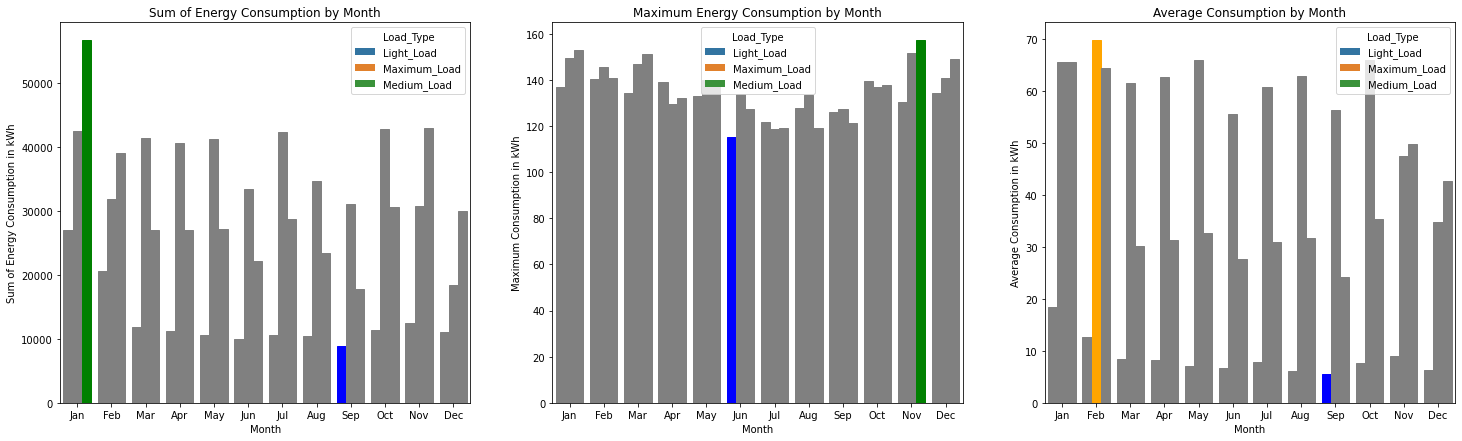

In [29]:
# create a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

#plot first graph for 1st subplot
sns.barplot(x = 'Month',y='Usage_kWh', data = Month_Usage , hue='Load_Type', ax=axes[0] ,ci=0)

max_value = Month_Usage['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Month_Usage['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[0].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('green') # set the color of the patch to orange
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[0].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('blue') # set the color of the patch to red
        
# add title and axis labels
axes[0].set_title('Sum of Energy Consumption by Month')
axes[0].set_ylabel('Sum of Energy Consumption in kWh')


#plot second graph for 2nd subplot
sns.barplot(x = 'Month',y='Usage_kWh', data = Month_Usage1, hue='Load_Type', ax=axes[1], ci=0)

max_value = Month_Usage1['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Month_Usage1['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[1].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('green') # set the color of the patch to green
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[1].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('blue') # set the color of the patch to blue
        
# add title and axis labels
axes[1].set_title('Maximum Energy Consumption by Month')
axes[1].set_ylabel('Maximum Consumption in kWh')



#plot third graph for 3rd subplot
sns.barplot(x = 'Month',y='Usage_kWh', data = Month_Usage2, hue='Load_Type',ax=axes[2], ci=0)

max_value = Month_Usage2['Usage_kWh'].max() # get the maximum value for Usage_kWh
min_value = Month_Usage2['Usage_kWh'].min() # get the minimum value for Usage_kWh

for p in axes[2].patches:
    if p.get_height() == max_value: # check if the height of the patch is equal to the maximum value
        p.set_color('orange') # set the color of the patch to green
    else:
        p.set_color('grey')# set the color of the patch to grey
        
for p in axes[2].patches:
    if p.get_height() == min_value: # check if the height of the patch is equal to the minimum value
        p.set_color('blue') # set the color of the patch to blue
        
# add title and axis labels
axes[2].set_title('Average Consumption by Month')
axes[2].set_ylabel('Average Consumption in kWh')

* Observations -
    * Total Energy Consumption is at its peak in January which is consumed by Medium loads, and the lowest is in September which is consumed by light loads.
    * Maximum Energy Consumption is peak in November by Medium loads, and is lowest in June by Light loads.
    * Average Energy Consumption is peak in February by Maximum loads, and is lowest in September by Light loads.

In [30]:
# view dataset
df.head(2)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month,Hour
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,Jan,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,Jan,0


### 6. What are the aggregate values for energy consumption for all the Load Types.

In [31]:
# to find sum of usage_kwh per load type
Agg = df.groupby(['Load_Type'])['Usage_kWh'].sum().reset_index()

# to find max usage_kwh per load type
Agg1 = df.groupby(['Load_Type'])['Usage_kWh'].max().reset_index()

# to find average usage_kwh per load type
Agg2 = df.groupby(['Load_Type'])['Usage_kWh'].mean().reset_index()

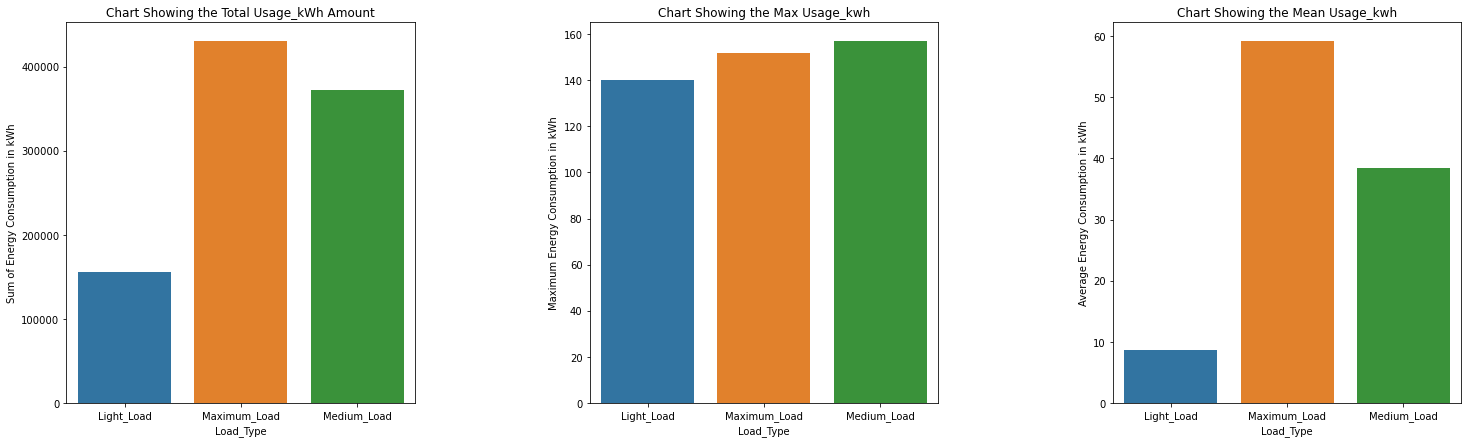

In [32]:
# create a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# plot the first graph in the first subplot
sns.barplot(x='Load_Type', y='Usage_kWh', data=Agg, ax=axes[0])
axes[0].set_title("Chart Showing the Total Usage_kWh Amount")
axes[0].set_ylabel('Sum of Energy Consumption in kWh')

# plot the second graph in the second subplot
sns.barplot(x='Load_Type', y='Usage_kWh', data=Agg1, ax=axes[1])
axes[1].set_title("Chart Showing the Max Usage_kwh")
axes[1].set_ylabel('Maximum Energy Consumption in kWh')

# plot the third graph in the third subplot
sns.barplot(x='Load_Type', y='Usage_kWh', data=Agg2, ax=axes[2])
axes[2].set_title("Chart Showing the Mean Usage_kwh")
axes[2].set_ylabel('Average Energy Consumption in kWh')


# adjust the spacing between subplots and display the plot
plt.subplots_adjust(wspace=0.5)
plt.show()

* Observations - 
    * In Total, Maximum load has highest Energy Consumption.
    * For max energy consumption, Medium Load is used to the maximum more.
    * But on Average Maximum load consumes more energy. 

In [33]:
# view dataset
df.head(2)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month,Hour
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,Jan,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,Jan,0


### 7 . Group Load Type and check the NSM and Usage_kWh(max, min and mean) values

In [34]:
# to view aggregate usage_kwh and NSM per load type

df.groupby(['Load_Type'])[['NSM','Usage_kWh']].agg(['max', 'min', 'mean'])

NSM                      Usage_kWh                 
                max    min          mean       max   min       mean
Load_Type                                                          
Light_Load    85500      0  28384.661355    140.29  0.00   8.626207
Maximum_Load  82800  36900  53036.138614    151.67  2.92  59.265314
Medium_Load   82800  33300  61810.396040    157.18  2.52  38.445394

### 8. Show the Correlation between all the values

In [35]:
# renaming columns
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lag_CRP(kVarh)', 
                        'Leading_Current_Reactive_Power_kVarh': 'Lead_CRP(kVarh)'})
df = df.rename(columns={'Lagging_Current_Power_Factor': 'Lag_CPF', 'Leading_Current_Power_Factor': 'Lead_CPF'})

In [36]:
# create variable to use for checking correlation
correlation = df[['Usage_kWh','Lag_CRP(kVarh)','Lead_CRP(kVarh)','CO2(tCO2)','Lag_CPF','Lead_CPF','NSM']]
correlation.corr()

,Usage_kWh,Lag_CRP(kVarh),Lead_CRP(kVarh),CO2(tCO2),Lag_CPF,Lead_CPF,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lag_CRP(kVarh),0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Lead_CRP(kVarh),-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lag_CPF,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Lead_CPF,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


Text(0.5, 1.0, 'Heatmap Showing the correlation on Energy consumption')

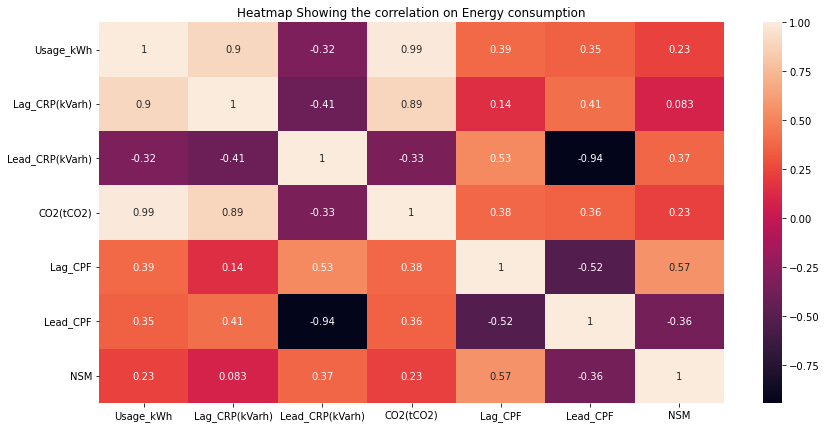

In [37]:
# view correlation with a heatmap
plt.figure(figsize=(14,7))
sns.heatmap(correlation.corr(),annot=True) # puts the values on the heatmap
plt.title('Heatmap Showing the correlation on Energy consumption')

* Observations -
    * Energy Consumption (Usage_kWh) is highly correlated with Lagging_Current_Reactive.Power - 0.9
    * Energy Consumption (Usage_kWh) is highly correlated with CO2 release - 0.99
    * Lagging_Current_Reactive.Power is highly correlated with CO2 release -0.89
    * Leading_Current_Reactive_Power is fairly correlated with Lagging_Current_Power_Factor - 0.53

In [38]:
# view dataset
df.head(2)

,date,Usage_kWh,Lag_CRP(kVarh),Lead_CRP(kVarh),CO2(tCO2),Lag_CPF,Lead_CPF,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month,Hour
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,Jan,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,Jan,0


### What is the Energy Consumption on Month, Days of the Week.

Text(0.5, 1.0, 'Heatmap Showing Energy Consumption on Month, Days of the Week')

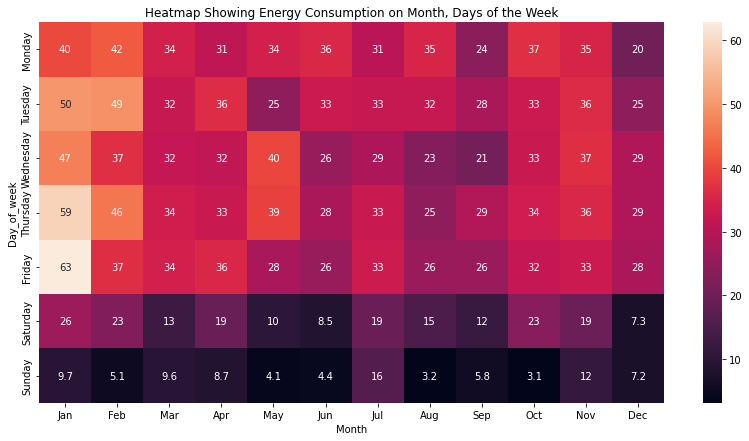

In [39]:
# plot heatmap to show days which energy consumption is high
plt.figure(figsize=(14,7))
x = df.pivot_table(values='Usage_kWh', index='Day_of_week', columns='Month')
sns.heatmap(x, annot=True) #Day_of_week
plt.title('Heatmap Showing Energy Consumption on Month, Days of the Week')

* Observations -
    * Energy consumption is higher in January on Days - Thursday and Friday

In [40]:
# view dataset
df.head(2)

,date,Usage_kWh,Lag_CRP(kVarh),Lead_CRP(kVarh),CO2(tCO2),Lag_CPF,Lead_CPF,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month,Hour
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,Jan,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,Jan,0


### Scatterplot to show loadtypes release of CO2 during energy consumption

Text(0.5, 1.0, 'Scatterplot showing Load_Types release of CO2 during energy consumption')

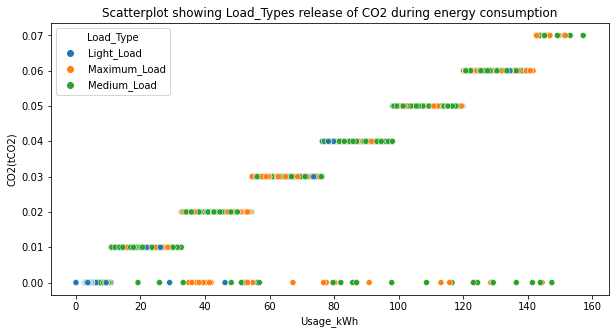

In [41]:
# plot graph
plt.figure(figsize=(10,5)) # set size of graph
sns.scatterplot(x = 'Usage_kWh', y = 'CO2(tCO2)', hue = 'Load_Type', data = df,
                hue_order = ['Light_Load', 'Maximum_Load', 'Medium_Load'])
plt.title('Scatterplot showing Load_Types release of CO2 during energy consumption')

* Observation -
    * As the usage of energy increases so does the amount of CO2 being released.
    * Maximum load is the load type with color green, that releases the most CO2.

### Density plot for loadtypes energy consumption

Text(0.5, 1.0, 'Plot Showing Load_Types energy consumption density')

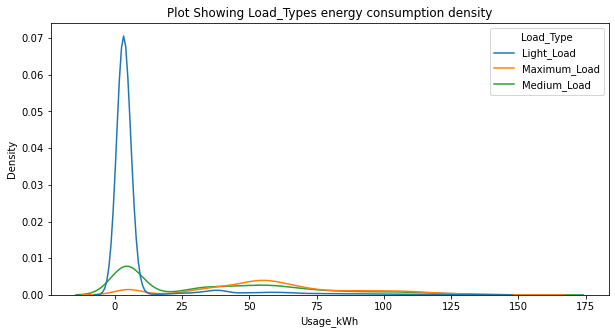

In [42]:
# plot graph
plt.figure(figsize=(10,5)) # set size of graph
sns.kdeplot(data=df, x = 'Usage_kWh', hue = 'Load_Type', hue_order = ['Light_Load', 'Maximum_Load', 'Medium_Load'])
plt.title('Plot Showing Load_Types energy consumption density')

* Observation - 
    * The density of light load for energy consumption is higher, followed by maximum load and then medium load.